Foundations of Artificial Intelligence Lab

Lab Exercise - 1

Breadth First Search(BFS) and Depth First Search(DFS)

Name: Gaurav Pendharkar

Register No.: 20BAI1153

# About the Dataset Chosen

Gnutella is a file sharing protocol that defines the way distributed nodes communicate over a peer-to-peer (P2P) network. A peer-to-peer network can be resembled as a Graph with Vertices as the hosts in the network topology and Edges as a connection between them. 
Hence, such a dataset was taken from https://snap.stanford.edu/data/p2p-Gnutella04.html .

# Opening the file

In [43]:
f = open(r"C:\Users\mitug\Artificial-Intelligence-Lab\Lab-1_BFS_and_DFS\p2p-Gnutella04.txt","r")

# Reading the file

In [44]:
edges = list(map(format,f.readlines()))

In [45]:
def format(s):
  s = s.split("\n")
  s = s[0].split("\t")
  return s

# Create the Graph from the txt file

The graph is collection vertices and edges. Here, the graph is stored in memory as a dictionary :

Key : as the vertex. 

Value : Its adjacent vertices.



In [46]:
graph = dict()
for i in edges:
  if int(i[0]) not in graph:
    graph[int(i[0])] = [int(i[1])]
  else:
    graph[int(i[0])].append(int(i[1]))

In [47]:
len(edges)

39994

In [48]:
graph

{0: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 1: [2, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 3: [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
 8: [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
 10: [41, 136, 137, 138, 139, 140, 141, 142, 143, 144],
 12: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
 14: [199, 756, 1116, 2537, 2787, 3307, 4524, 4674, 6016, 7040],
 17: [79, 80, 81, 82, 83, 84, 85, 86, 87, 88],
 19: [69, 70, 71, 72, 73, 74, 75, 76, 77, 78],
 20: [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 21: [22, 60, 61, 62, 63, 64, 65, 66, 67, 68],
 23: [108, 109, 110, 111, 112, 113, 114, 115, 116],
 25: [98, 99, 100, 101, 102, 103, 104, 105, 106, 107],
 26: [78, 89, 90, 91, 92, 93, 94, 95, 96, 97],
 29: [654],
 30: [185, 186],
 38: [117, 118, 119, 120, 121, 122, 123, 124, 125, 126],
 39: [155, 156, 157, 158, 159, 160, 161, 162, 163, 164],
 46: [92, 127, 128, 129, 130, 131, 132, 133, 134, 135],
 54: [145, 146, 147, 148, 149, 150, 151, 152, 153, 154],
 58: [165, 166, 167, 168, 169, 170, 171, 172, 173, 174],
 60

# Using Breadth First Search(BFS)

A breadth first search is level-order traversal of the graph. In order to implement a BFS we use Queue data structure to store the vertices level-wise. In python, a Queue can be implemented using a List with :

List.append(Vertex) : Enqueue a Vertex   and List.pop(0) : Dequeue a Vertex

## Problem Statement

Find all the hosts in the network topology which need 'n - 1' hops to reach from the given root vertex. 
Since, the graph has many vertices the output is represented in the form of a Barplot with :

1. X-axis : Levels of the Graph
2. Y-axis : No.of reachable nodes in the Level.

### BFS Code

In [49]:
#BFS Code with a modification to seggregate vertices at different levels.
def findHost(n,root):
   hosts = []
   queue=[root]
   visited = []
   #j = 0
   t = len(queue)
   l = 0
   while len(queue) != 0:
     #print("Before : ",queue)
     currentpage = queue.pop(0)
     t -= 1
     
     #print("After : ",queue)
     if l==n and currentpage not in visited:
      hosts.append(currentpage)
      #print("Vertex no. : ",j)
     #j += 1
     visited.append(currentpage)
     if currentpage in graph:
        for i in graph[currentpage]:
          if i not in visited:
           queue.append(i) 
     if t == 0:
        t = len(queue)
        l += 1
     if l > n:
        break
   return hosts
       

### Driver's Code

In [50]:
# Driver's Code
x = findHost(1,1)
a = []
p = 0
c = 1
while len(x) > 0:
    #print(c,len(x),len(set(x)))
    a.append(len(x))
    c += 1
    x = findHost(c,1)

### Plotting a bar chart

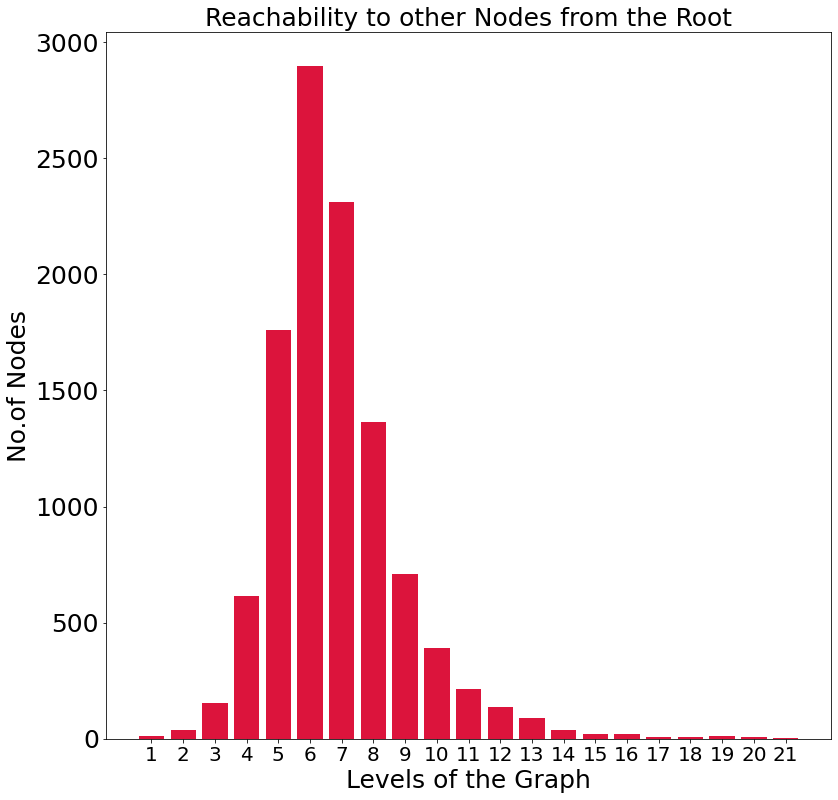

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,13))
plt.bar([str(i+1) for i in range(len(a))],height=a,color='crimson')
plt.title('Reachability to other Nodes from the Root',font={"size":25})
plt.xticks(font={"size":20})
plt.yticks(font={"size":25})
plt.xlabel('Levels of the Graph',font={"size":25})
plt.ylabel('No.of Nodes',font={"size":25})
plt.show()

# Using Depth First Search(DFS)

A depth first search is an approach to traverse the graph. In order to implement a DFS we use Stack data structure to store the vertices depth-wise. In python, a Stack can be implemented using a List with :

List.append(Vertex) : Push a Vertex   and List.pop() : Pop a Vertex

## Problem Statement

Find all the paths from a given source to a destination using Depth First Search for a subgraph of the parent graph.

Note: A subgraph of the original graph is chosen because the plotting of the latter one is cumbersome.

## Creating a Subgraph of the Original Graph

In [52]:
key = list(graph.keys())[0:350]
subgraph = dict([(i,graph[i]) for i in key])

In [53]:
subgraph

{0: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 1: [2, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 3: [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
 8: [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
 10: [41, 136, 137, 138, 139, 140, 141, 142, 143, 144],
 12: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
 14: [199, 756, 1116, 2537, 2787, 3307, 4524, 4674, 6016, 7040],
 17: [79, 80, 81, 82, 83, 84, 85, 86, 87, 88],
 19: [69, 70, 71, 72, 73, 74, 75, 76, 77, 78],
 20: [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 21: [22, 60, 61, 62, 63, 64, 65, 66, 67, 68],
 23: [108, 109, 110, 111, 112, 113, 114, 115, 116],
 25: [98, 99, 100, 101, 102, 103, 104, 105, 106, 107],
 26: [78, 89, 90, 91, 92, 93, 94, 95, 96, 97],
 29: [654],
 30: [185, 186],
 38: [117, 118, 119, 120, 121, 122, 123, 124, 125, 126],
 39: [155, 156, 157, 158, 159, 160, 161, 162, 163, 164],
 46: [92, 127, 128, 129, 130, 131, 132, 133, 134, 135],
 54: [145, 146, 147, 148, 149, 150, 151, 152, 153, 154],
 58: [165, 166, 167, 168, 169, 170, 171, 172, 173, 174],
 60

## Visualising the Paths using Networkx module

In [54]:
import networkx as nx

import matplotlib.pyplot as plt
 
g = nx.Graph()

## Finding all the paths using DFS

In [1]:
def findPaths(source, destination,visited,path):
 
        visited.append(source)
        path.append(source)

        if source == destination:
            # Adding new edges to the graph visual.
            for i in range(1,len(path)):
                g.add_edge(path[i],path[i - 1])
        else:
            if source in subgraph:
             for i in subgraph[source]:
                if i not in visited:
                    findPaths(i, destination, visited, path)
        x = path.pop()
        visited.remove(x)

## Driver's Code

### Finding the paths from a Source to a Destination (i.e 0 to 145)

In [56]:
findPaths(0,145,[],[])

### Visualizing the Graph

In [57]:
node_colors = ["orange" if n == 0 or n == 145 else "yellow" for n in g.nodes()]

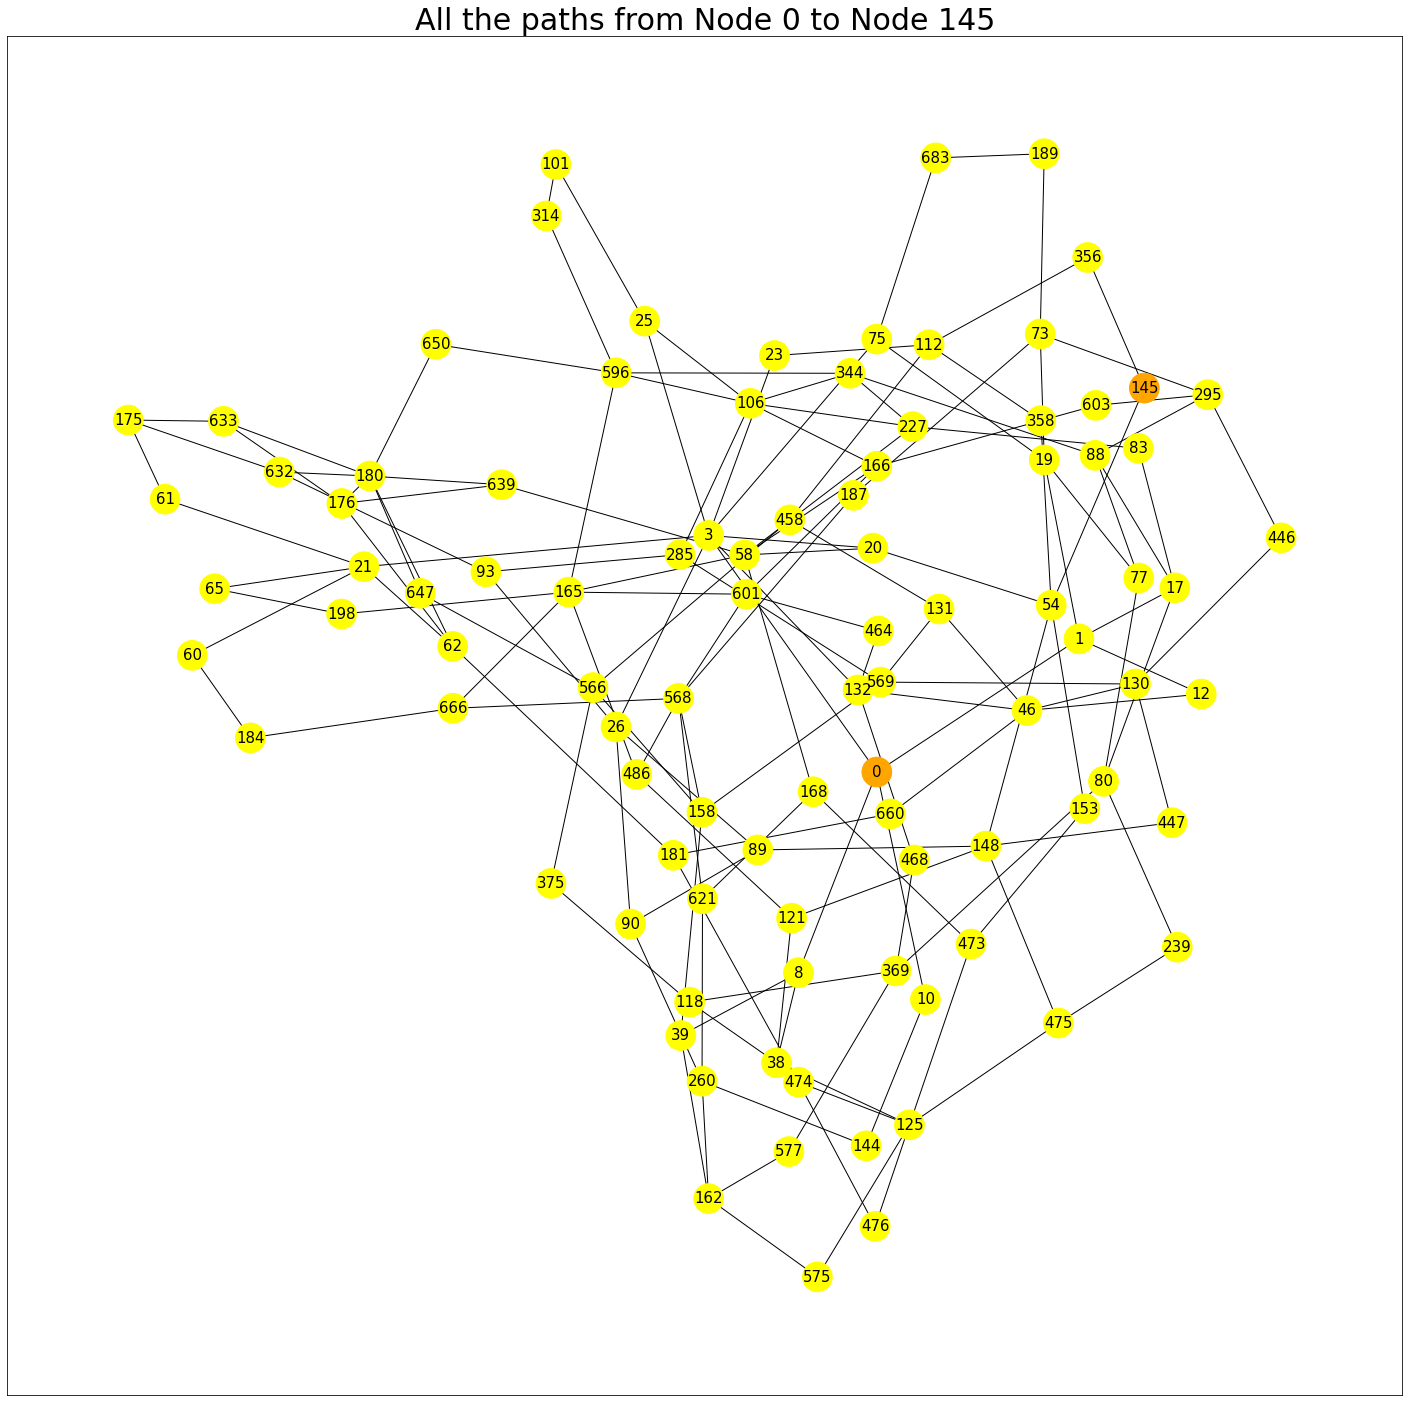

In [58]:
plt.figure(figsize=(25,25))
pos = nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos=pos, node_color=node_colors,node_size=880)
nx.draw_networkx_edges(g, pos=pos)
nx.draw_networkx_labels(g, pos, font_size=15)
plt.title("All the paths from Node 0 to Node 145",font={"size":30})
plt.show()